In [1]:
# Iniciamos el EDA con el objetivo de ir revizando y analizando la informacion para llegar finalmente al inicio del diseño del recomendador.
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')   # Ignorar warnings

# Añadimos el directorio 'src' al sys.path para poder importar los módulos locales
sys.path.append('/Users/usuario/Documents/DATA_SCIENCE/M7_LABs_Proyectos_individuales/mvp_pi1')

# Importamos las funciones de los scripts
import src.services as sr


# Configuramos el entorno
# Cargamos los tres dataset (data_movies, data_crew, data_cast)
df_movies = pd.read_csv('/Users/usuario/Documents/DATA_SCIENCE/M7_LABs_Proyectos_individuales/mvp_pi1/transformados_processed/data_movies.csv', low_memory=False)
df_crew = pd.read_csv('/Users/usuario/Documents/DATA_SCIENCE/M7_LABs_Proyectos_individuales/mvp_pi1/transformados_processed/data_crew.csv', low_memory=False)
df_cast = pd.read_csv('/Users/usuario/Documents/DATA_SCIENCE/M7_LABs_Proyectos_individuales/mvp_pi1/transformados_processed/data_cast.csv', low_memory=False)

# Revisamos la informacion de los dataset
pd.set_option('display.width', 1000)  # Establece un ancho suficientemente grande para la impresion de columnas
pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en varias líneas en la impresion
pd.set_option('display.max_colwidth', None) # Establece máximo ancho posible para evitar truncamiento de texto en la impresion

In [2]:
# Revisamos la informacion de los dataset
# 
from src.services import validar_df # Importamos la funcion validar_df del modulo services

print(df_movies.columns)
print(df_movies.shape)
print(df_movies.describe())
print(validar_df(df_movies))
print(df_movies.head(3))
print(df_crew.columns)
print(df_crew.shape)
print(df_crew.describe())
print(validar_df(df_crew))
print(df_crew.head(3))
print(df_cast.columns)
print(df_cast.shape)
print(df_cast.describe())
print(validar_df(df_cast))
print(df_cast.head(3))

Index(['movie_id', 'title', 'tagline', 'release_date', 'release_year', 'runtime', 'budget', 'revenue', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'overview', 'popularity', 'vote_average', 'vote_count', 'belongs_to_collection', 'status', 'return'], dtype='object')
(45376, 20)
            movie_id  release_year       runtime        budget       revenue    popularity  vote_average    vote_count        return
count   45376.000000  45376.000000  45130.000000  4.537600e+04  4.537600e+04  45376.000000  45376.000000  45376.000000  4.537600e+04
mean   108027.103094   1991.881193     94.181675  4.232604e+06  1.123010e+07      2.926458      5.624070    110.096439  6.600428e+02
std    112168.377996     24.055360     38.341059  1.743986e+07  6.438996e+07      6.009672      1.915423    491.742894  7.469329e+04
min         2.000000   1874.000000      0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000  0.000000e+00
25%

In [3]:
# Revisamos los tipos de datos que deberian tener los campos de los dataset y generamos los diccionarios de tipos
diccionario_tipos_data_movies = {
    "movie_id": int,                 # ID único de la película
    "title": str,                    # Título de la película
    "tagline": str,                  # Eslogan (puede ser nulo)
    "release_date": pd.Timestamp,    # Fecha de estreno -> datetime
    "release_year": int,             # Año de estreno
    "runtime": float,                # Duración en minutos
    "budget": int,                   # Presupuesto (0 indica a veces 'desconocido')
    "revenue": int,                  # Recaudación (0 indica a veces 'desconocido')
    "genres": list,                  # Lista de diccionarios con géneros
    "production_companies": list,    # Lista de diccionarios con productoras
    "production_countries": list,    # Lista de diccionarios con países
    "spoken_languages": list,        # Lista de diccionarios con idiomas
    "original_language": str,        # Código de idioma (ej. 'en')
    "overview": str,                 # Resumen en texto
    "popularity": float,             # Puntaje de popularidad
    "vote_average": float,           # Promedio de votos
    "vote_count": float,             # Cantidad total de votos
    "belongs_to_collection": dict,   # Diccionario con detalles de la colección (si existe)
    "status": str,                   # Estado de la película (ej. 'Released')
    "return": float                  # revenue / budget
}
diccionario_tipos_data_crew = {
    "movie_id": int,       # ID de la película (para cruzar con data_movies)
    "credit_id": str,      # Identificador del crédito
    "department": str,     # Departamento (Directing, Production, etc.)
    "gender": int,         # 0=desconocido, 1=femenino, 2=masculino
    "id": int,             # ID de la persona (TMDB)
    "job": str,            # Rol específico (Director, Producer, etc.)
    "name": str,           # Nombre de la persona
    "profile_path": str    # Ruta de imagen (puede ser nulo)
}
diccionario_tipos_data_cast = {
    "movie_id": int,      # ID de la película
    "cast_id": int,       # ID interno de TMDB para el reparto (originalmente float)
    "character": str,     # Personaje interpretado
    "credit_id": str,     # Identificador del crédito
    "gender": int,        # 0=desconocido, 1=femenino, 2=masculino
    "id": int,            # ID de la persona (TMDB)
    "name": str,          # Nombre del actor/actriz
    "order": int,         # Orden en créditos (0=principal)
    "profile_path": str   # Ruta de imagen (nulo si no hay)
}

In [4]:
from src.services import convertir_tipos

# 
df_movies = convertir_tipos(df_movies, diccionario_tipos_data_movies)
print(df_movies.describe())
print(validar_df(df_movies))
df_crew = convertir_tipos(df_crew, diccionario_tipos_data_crew)
print(df_crew.describe())
print(validar_df(df_crew))
df_cast = convertir_tipos(df_cast, diccionario_tipos_data_cast)
print(df_cast.describe())
print(validar_df(df_cast))


            movie_id                   release_date  release_year       runtime        budget       revenue    popularity  vote_average    vote_count        return
count   45376.000000                          45376  45376.000000  45130.000000  4.537600e+04  4.537600e+04  45376.000000  45376.000000  45376.000000  4.537600e+04
mean   108027.103094  1992-05-15 17:10:50.564174848   1991.881193     94.181675  4.232604e+06  1.123010e+07      2.926458      5.624070    110.096439  6.600428e+02
min         2.000000            1874-12-09 00:00:00   1874.000000      0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000  0.000000e+00
25%     26385.750000            1978-10-06 00:00:00   1978.000000     85.000000  0.000000e+00  0.000000e+00      0.388840      5.000000      3.000000  0.000000e+00
50%     59857.500000            2001-08-30 00:00:00   2001.000000     95.000000  0.000000e+00  0.000000e+00      1.130454      6.000000     10.000000  0.000000e+00
75%    156533.50

In [ ]:
# Se identifica que el campo belongs_to_collection tiene 40888 valores nulos, sus datos son listas de diccionarios con información
# irrelevante para desarrollar el recomendador por lo cual se elimina, lo mismo haremos con los campos budget, revenue y return
# ya que la mayoria son cero y no aportarían mayor informacion al entrenamiento para el recomendador.
# Eliminamos las columnas siempre y cuando existan
# Primero, creamos una lista de columnas a eliminar
columnas_a_eliminar = ['belongs_to_collection', 'budget', 'revenue', 'return']
# Ahora, filtramos la lista para quedarnos solo con las columnas que existen en df_movies
columnas_existentes = [col for col in columnas_a_eliminar if col in df_movies.columns]
# Eliminamos las columnas existentes, siempre y cuando existan
df_movies.drop(columns=columnas_existentes, inplace=True)   

print(df_movies.columns)

# Para revisar los datos de df_crew y df_cast revisamos si están o no parseados los campos tipo object que sabemos 
# contienen listas de diccionarios, especificamnete los campos (genres, production_companies, production_countries, spoken_languages)
# Si se parsearon correctamente, deberían ser listas de diccionarios, si no se parsearon correctamente, deberían ser strings. 
print(type(df_movies['genres'].iloc[0]))
print(type(df_movies['production_companies'].iloc[0]))
print(type(df_movies['production_countries'].iloc[0]))
print(type(df_movies['spoken_languages'].iloc[0]))

# Luego de validar el contenido de los df_crew y df_cast se identifica que los campos genres, production_companies, 
# production_countries, spoken_languages se pueden unificar en un solo campo llamado dato_crew que contendrá los embeddings
# de los campos mencionados, para ello se crea una funcion que unifique los campos en un solo campo llamado dato_crew
# Creamos la funcion unificar_campos
def unificar_campos(df):
    # Unificamos los campos en un solo campo llamado dato_crew
    df['dato_crew'] = df['genres'] + df['production_companies'] + df['production_countries'] + df['spoken_languages']
    # Eliminamos los campos que unificamos
    df.drop(columns=['genres', 'production_companies', 'production_countries', 'spoken_languages'], inplace=True)
    return df



Index(['movie_id', 'title', 'tagline', 'release_date', 'release_year', 'runtime', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'overview', 'popularity', 'vote_average', 'vote_count', 'status'], dtype='object')
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


(45376, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie_id               45376 non-null  int64         
 1   title                  45376 non-null  object        
 2   tagline                45376 non-null  object        
 3   release_date           45376 non-null  datetime64[ns]
 4   release_year           45376 non-null  int64         
 5   runtime                45130 non-null  float64       
 6   budget                 45376 non-null  int64         
 7   revenue                45376 non-null  int64         
 8   genres                 45376 non-null  object        
 9   production_companies   45376 non-null  object        
 10  production_countries   45376 non-null  object        
 11  spoken_languages       45376 non-null  object        
 12  original_language      45376 non-null  object   

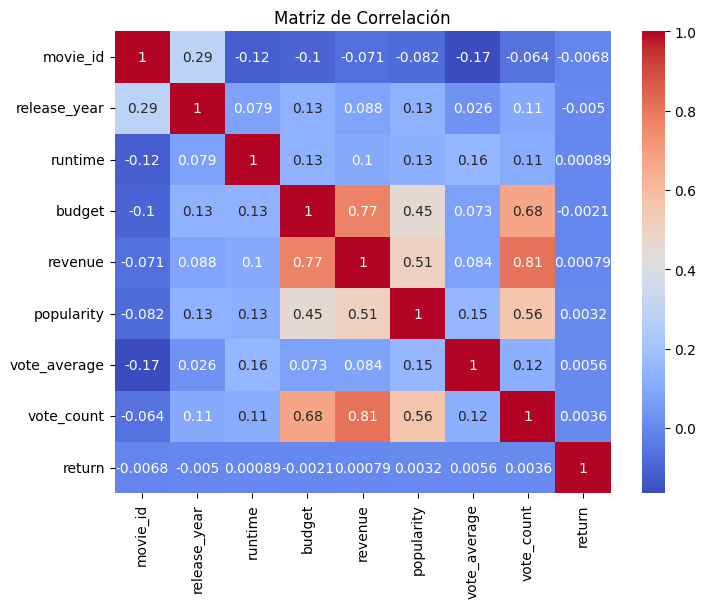

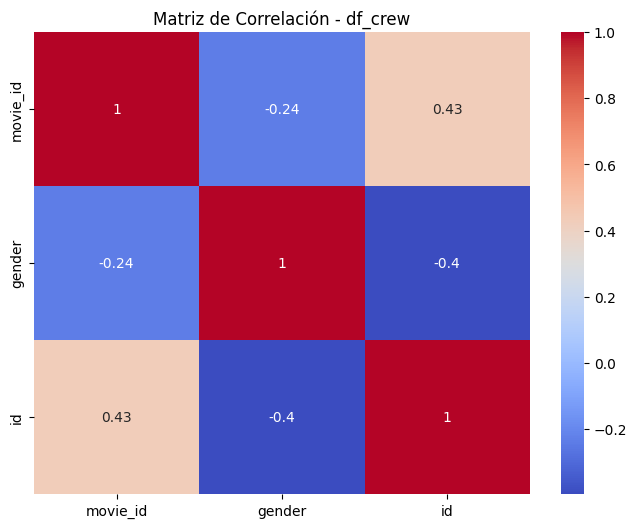

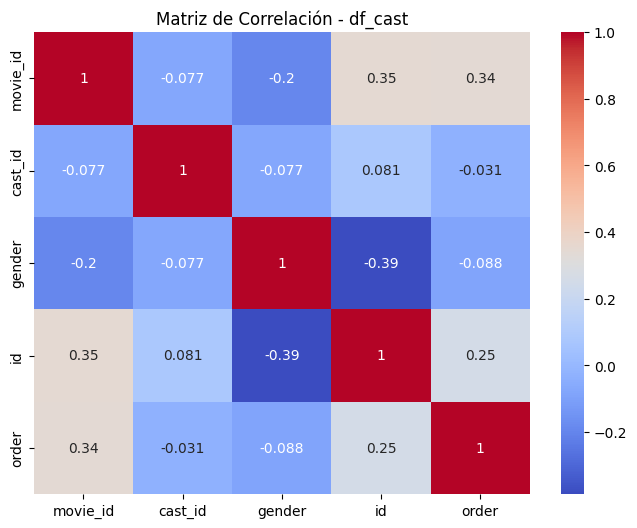

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Validamos las correlaciones de los campos del dataset df_movies_movies

print(df_movies.shape)
print(df_movies.info())
print(df_movies.describe())
 
# Correlación de los campos numéricos
# Seleccionamos solo las columnas numéricas
numeric_df = df_movies.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación de los campos del dataset df_movies
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Correlación de los campos numéricos para df_crew
numeric_df_crew = df_crew.select_dtypes(include=[np.number])
corr_crew = numeric_df_crew.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_crew, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - df_crew")
plt.show()

# Correlación de los campos numéricos para df_cast
numeric_df_cast = df_cast.select_dtypes(include=[np.number])
corr_cast = numeric_df_cast.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_cast, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - df_cast")
plt.show()

In [ ]:
# Convertir string a listas de diccionarios
# hacemos una copia del dataframe original
#df_movies_genres["genres"] = df_movies.copy()
# Ahora extraeremos la lista de datos contenidos en los diccionarios de los campos anidados tipo Lista de Diccionarios
# estos campos son genres, production_companies, production_countries, spoken_languages

# Función para desanidar en un df campos con datos tipo lista de diccionarios y luego aplicar OneHotEncoding
# Es util cuando los cmpos resultantes no son muchos y nos sirve para los analisis visuales de distribuciones 
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer

def one_hot_encode_desanidado(df, campo):
    """
    Convierte un campo anidado (lista de diccionarios) en un DataFrame de One-Hot Encoding.

    Parámetros:
    df (pd.DataFrame): DataFrame original.
    campo (str): Nombre del campo a procesar.

    Retorna:
    df_encoded (pd.DataFrame): DataFrame con One-Hot Encoding del campo procesado.
    """

    # Función para transformar cada valor en una lista de nombres
    def extraer_nombres(valor):
        if isinstance(valor, str):
            try:
                valor = ast.literal_eval(valor)  # Convertir string en lista de diccionarios
            except (SyntaxError, ValueError):
                return []  # Si falla la conversión, devolver lista vacía
        if isinstance(valor, list):
            return [d["name"] for d in valor if isinstance(d, dict) and "name" in d]
        return []  # Si el valor no es lista ni diccionario, devolver lista vacía

    # Aplicar la transformación
    df[campo] = df[campo].apply(extraer_nombres)

    # Aplicar One-Hot Encoding
    mlb = MultiLabelBinarizer()
    df_encoded = pd.DataFrame(mlb.fit_transform(df[campo]), columns=mlb.classes_)

    return df_encoded


# Usamos un df copia para no afectar el df original y lo hacemos con cada capo anidado ( genres, production_companies, production_countries, spoken_languages)
df_movies_ohe = df_movies.copy()
# Convertimos el campo genres en One-Hot Encoding
genres_ohe = one_hot_encode_desanidado(df_movies_ohe, "genres")
print(genres_ohe.head(4))  # Ahora debería imprimirse correctamente
# Convertimos el campo production_companies en One-Hot Encoding
production_companies_ohe = one_hot_encode_desanidado(df_movies_ohe, "production_companies")
print(production_companies_ohe.head(4))
# Convertimos el campo production_countries en One-Hot Encoding
production_countries_ohe = one_hot_encode_desanidado(df_movies_ohe, "production_countries")
print(production_countries_ohe.head(4))
# Convertimos el campo spoken_languages en One-Hot Encoding
spoken_languages_ohe = one_hot_encode_desanidado(df_movies_ohe, "spoken_languages")
print(spoken_languages_ohe.head(4))

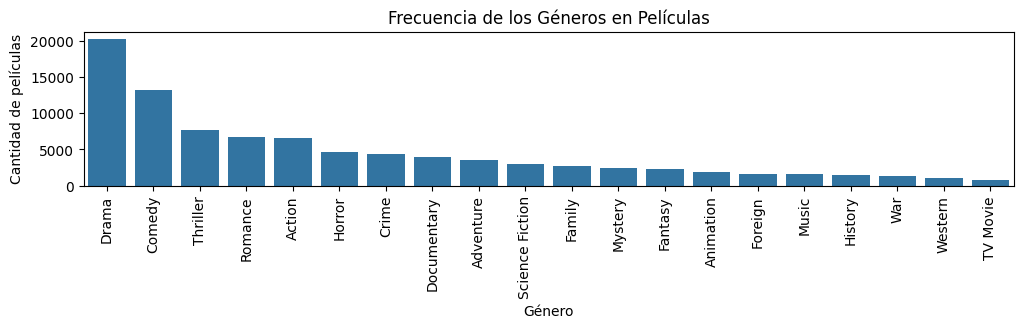

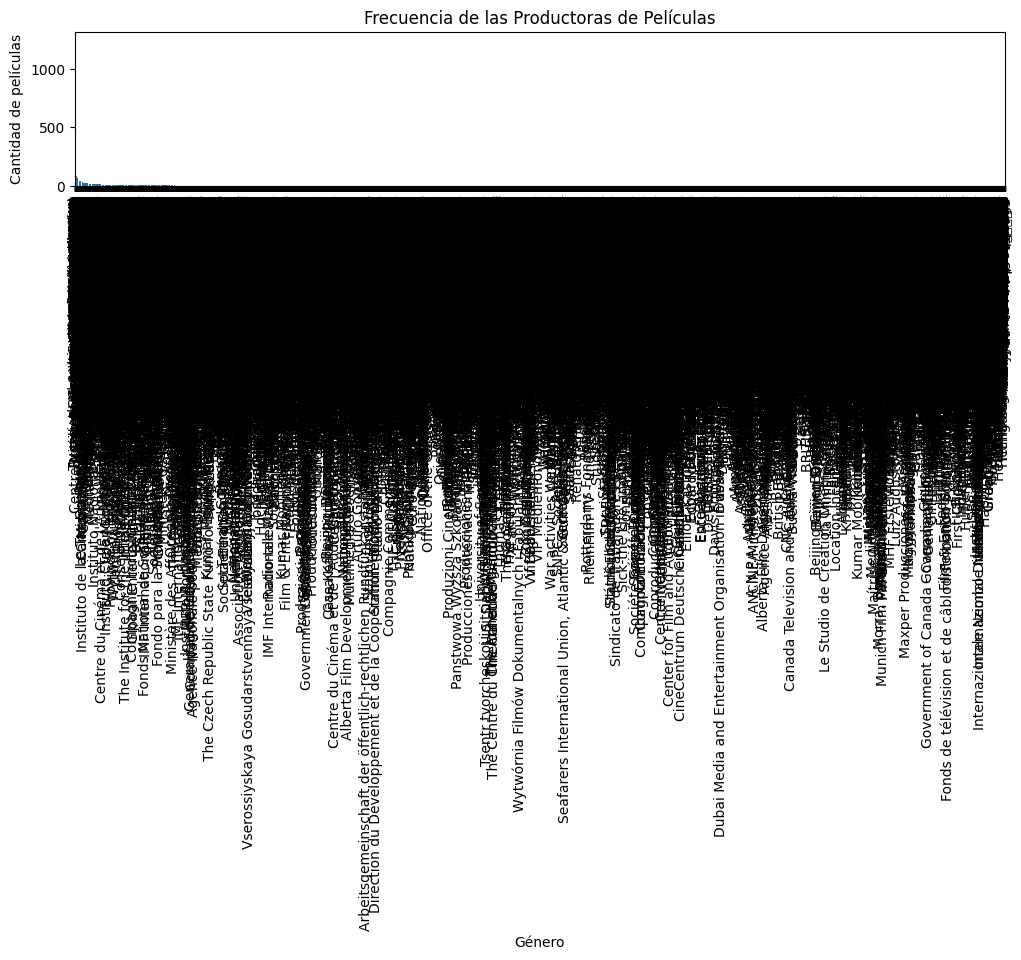

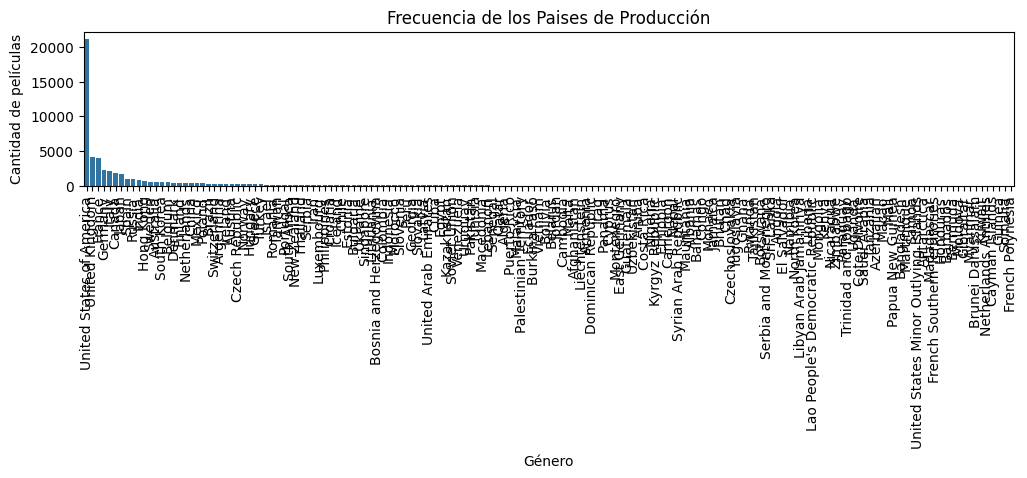

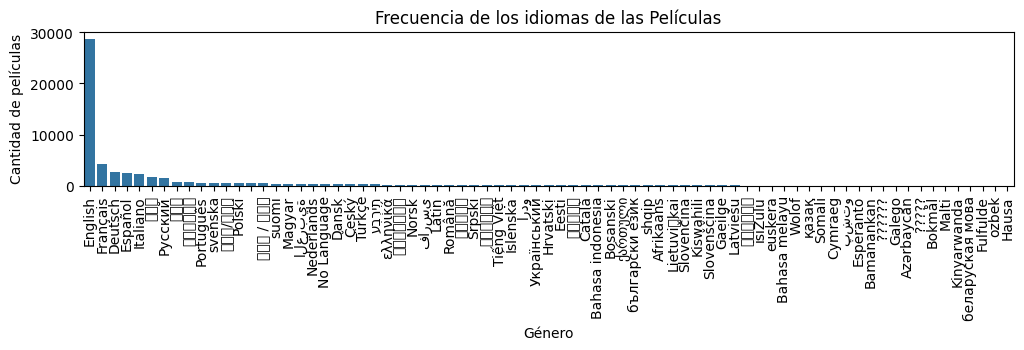

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar la frecuencia de cada género
genres_counts = genres_ohe.sum().sort_values(ascending=False)
production_companies_counts = production_companies_ohe.sum().sort_values(ascending=False)
production_countries_counts = production_countries_ohe.sum().sort_values(ascending=False)
spoken_languages_counts = spoken_languages_ohe.sum().sort_values(ascending=False)

# Visualizamos en gráfico de barras la frecuencia de los géneros
plt.figure(figsize=(12, 2))
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de los Géneros en Películas")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

# Visualizamos en gráfico de barras la frecuencia de las productoras
plt.figure(figsize=(12, 2))
sns.barplot(x=production_companies_counts.index, y=production_companies_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de las Productoras de Películas")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

# Visualizamos en gráfico de barras la frecuencia de los paises de producción
plt.figure(figsize=(12, 2))
sns.barplot(x=production_countries_counts.index, y=production_countries_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de los Paises de Producción")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

# Visualizamos en gráfico de barras la frecuencia de los idiomas hablados
plt.figure(figsize=(12, 2))
sns.barplot(x=spoken_languages_counts.index, y=spoken_languages_counts.values)  # Cambiar por spoken_languages_counts
plt.xticks(rotation=90)
plt.title("Frecuencia de los idiomas de las Películas")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()


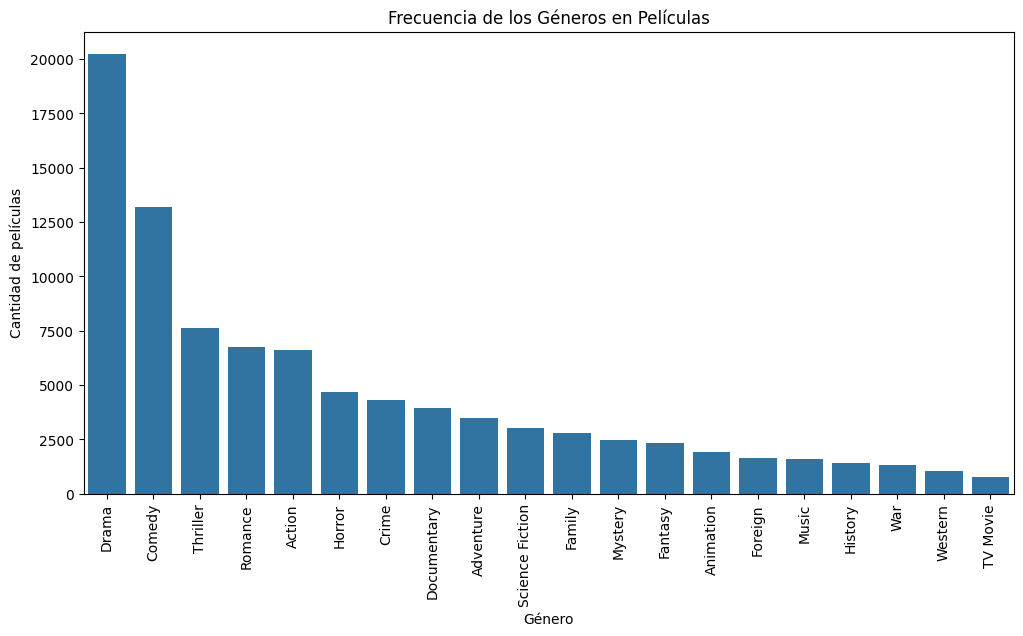

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar la frecuencia de cada género
genres_counts = genres_ohe.sum().sort_values(ascending=False)

# Visualizar con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de los Géneros en Películas")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()


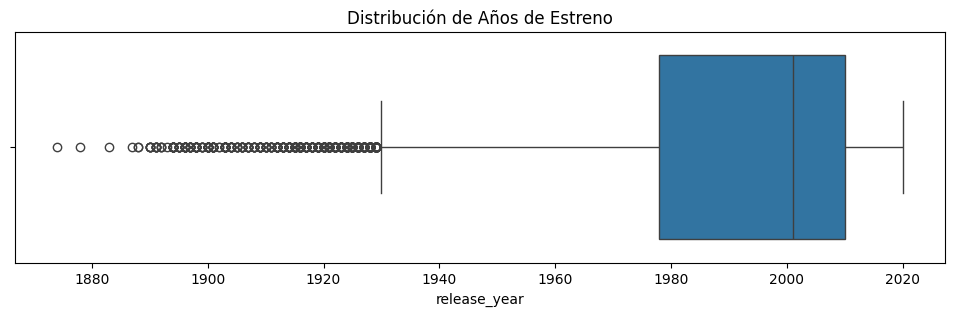

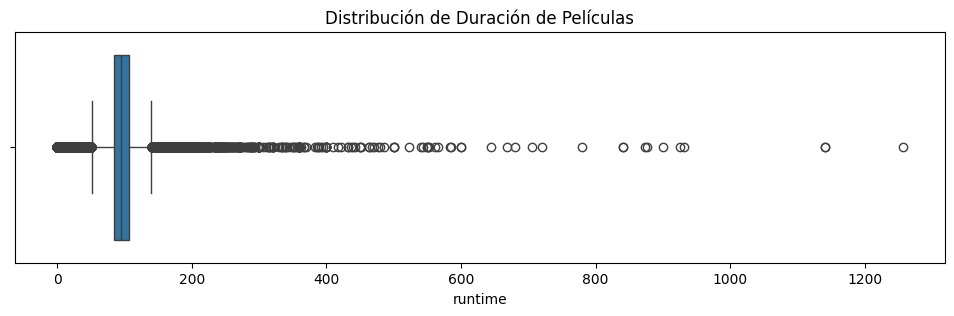

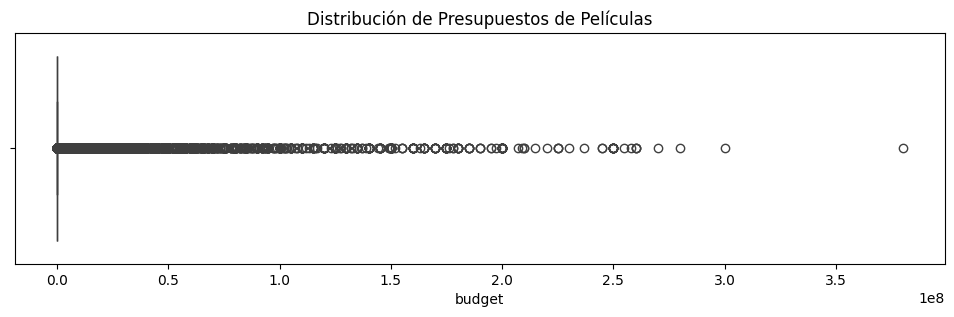

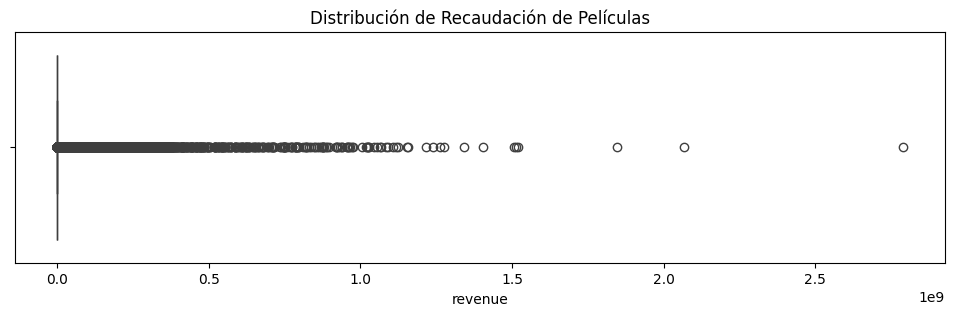

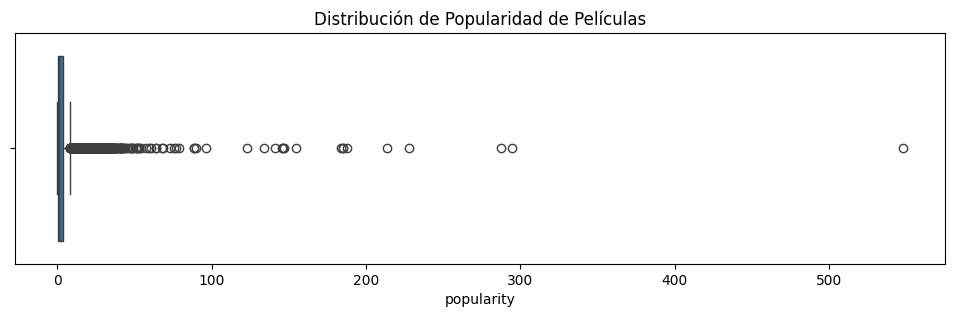

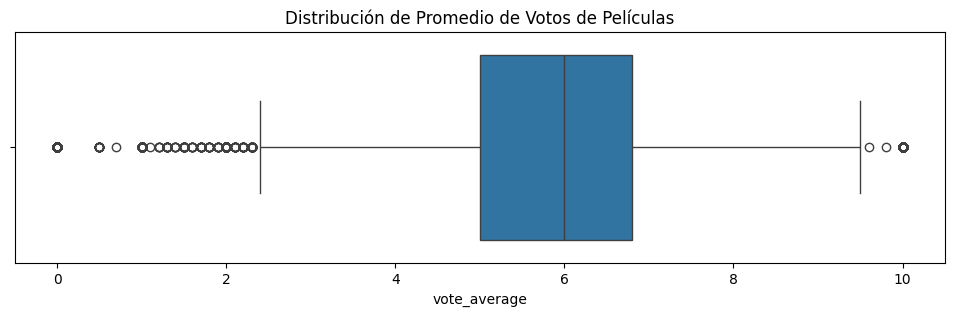

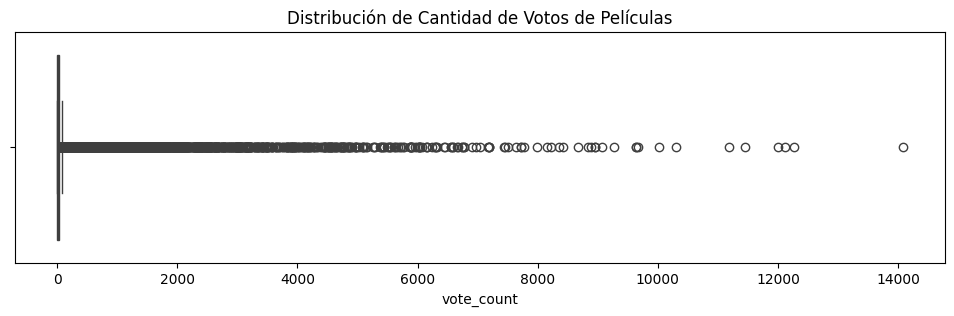

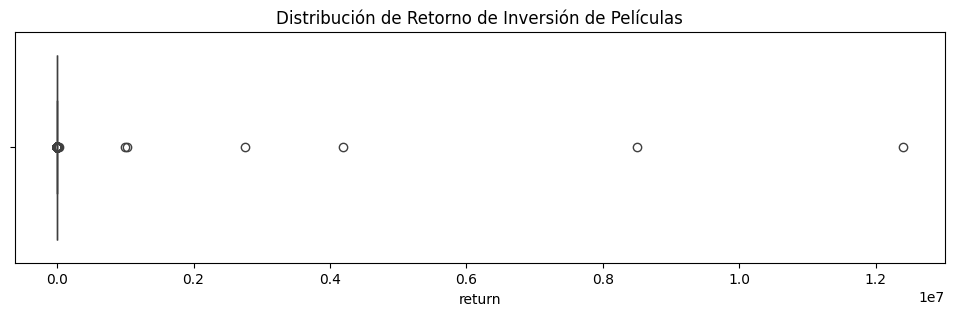

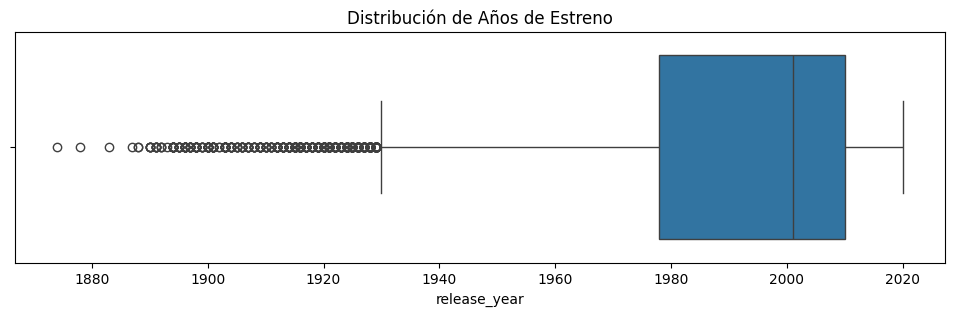

'\n# Seleccionamos solo las columnas numéricas para analizar outliers\nnumerical_columns = df_movies.select_dtypes(include=[np.number]).columns\nprint(numerical_columns)\n\n# Creamos una visualización de boxplots para cada variable numérica\nplt.figure(figsize=(15, 10))\ndf_movies[numerical_columns].boxplot(rot=90)\nplt.title("Distribución de valores numéricos y detección de outliers")\nplt.show()\n\n# Calculamos los valores estadísticos para detectar outliers\noutlier_summary = {}\nfor col in numerical_columns:\n    Q1 = df_movies[col].quantile(0.25)\n    Q3 = df_movies[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outliers = df_movies[(df_movies[col] < lower_bound) | (df_movies[col] > upper_bound)][col]\n    \n    outlier_summary[col] = {\n        "total_outliers": len(outliers),\n        "lower_bound": lower_bound,\n        "upper_bound": upper_bound,\n        "outliers_percentage": len(outliers) / len(df_movies) * 10

In [ ]:
# Ahora validaremos los outliers en las variables numéricas
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Validamos outliers en las variables numéricas
# Creamos una visualización boxplot del campo "release_year" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["release_year"])
plt.title("Distribución de Años de Estreno")
plt.show()

# Creamos una visualización boxplot del campo "runtime" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["runtime"])
plt.title("Distribución de Duración de Películas")
plt.show()

# Creamos una visualización boxplot del campo "budget" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["budget"])
plt.title("Distribución de Presupuestos de Películas")
plt.show()

# Creamos una visualización boxplot del campo "revenue" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["revenue"])
plt.title("Distribución de Recaudación de Películas")
plt.show()

# Creamos una visualización boxplot del campo "popularity" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["popularity"])
plt.title("Distribución de Popularidad de Películas")
plt.show()

# Creamos una visualización boxplot del campo "vote_average" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["vote_average"])
plt.title("Distribución de Promedio de Votos de Películas")
plt.show()

# Creamos una visualización boxplot del campo "vote_count" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["vote_count"])
plt.title("Distribución de Cantidad de Votos de Películas")
plt.show()

# Creamos una visualización boxplot del campo "return" para detectar outliers
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["return"])
plt.title("Distribución de Retorno de Inversión de Películas")
plt.show()

# Visualización de boxplot para detectar outliers en la variable "release_year"
plt.figure(figsize=(12,3))
sns.boxplot(x=df_movies["release_year"])
plt.title("Distribución de Años de Estreno")
plt.show()

In [49]:
# Validamos estadistica descriptiva de las variables numericas
print(df_movies.describe())
print(validar_df(df_movies))


            movie_id                   release_date  release_year       runtime        budget       revenue    popularity  vote_average    vote_count        return
count   45376.000000                          45376  45376.000000  45130.000000  4.537600e+04  4.537600e+04  45376.000000  45376.000000  45376.000000  4.537600e+04
mean   108027.103094  1992-05-15 17:10:50.564174848   1991.881193     94.181675  4.232604e+06  1.123010e+07      2.926458      5.624070    110.096439  6.600428e+02
min         2.000000            1874-12-09 00:00:00   1874.000000      0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000  0.000000e+00
25%     26385.750000            1978-10-06 00:00:00   1978.000000     85.000000  0.000000e+00  0.000000e+00      0.388840      5.000000      3.000000  0.000000e+00
50%     59857.500000            2001-08-30 00:00:00   2001.000000     95.000000  0.000000e+00  0.000000e+00      1.130454      6.000000     10.000000  0.000000e+00
75%    156533.50

<Figure size 1200x200 with 0 Axes>

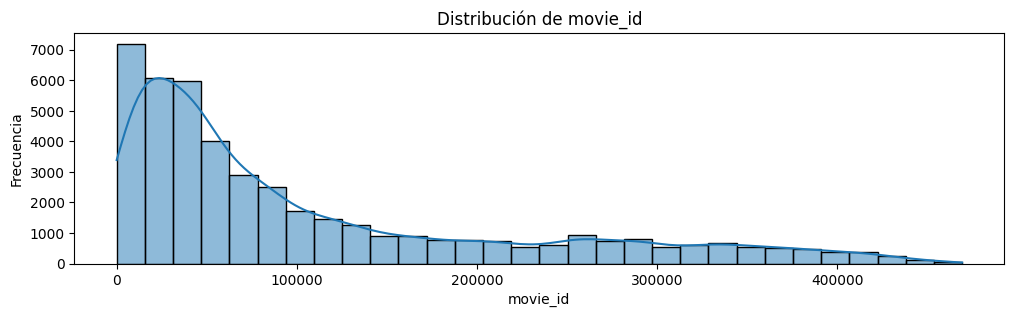

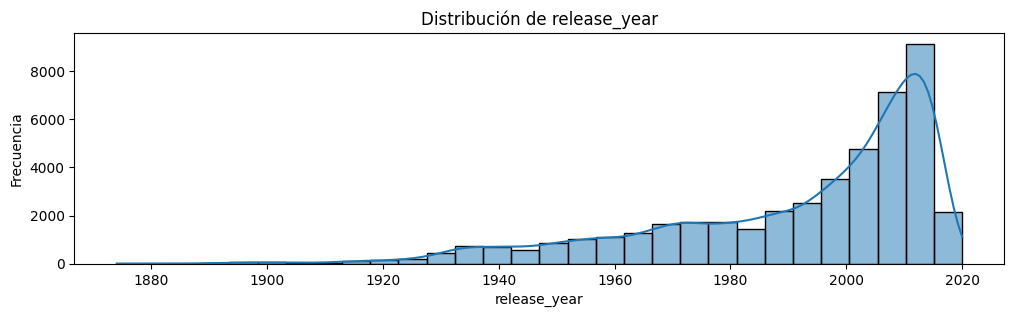

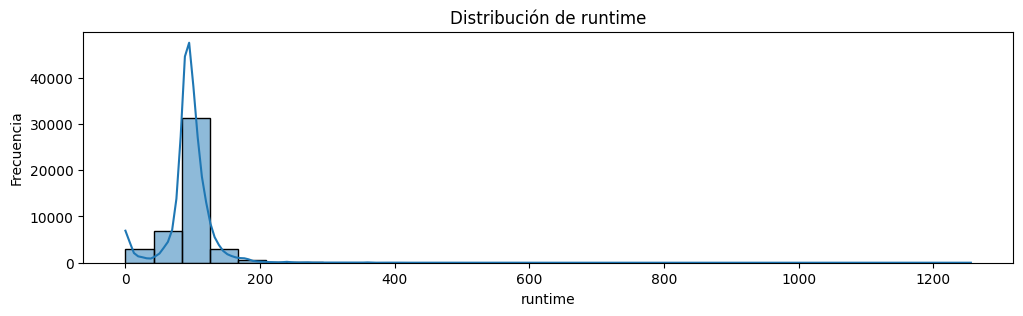

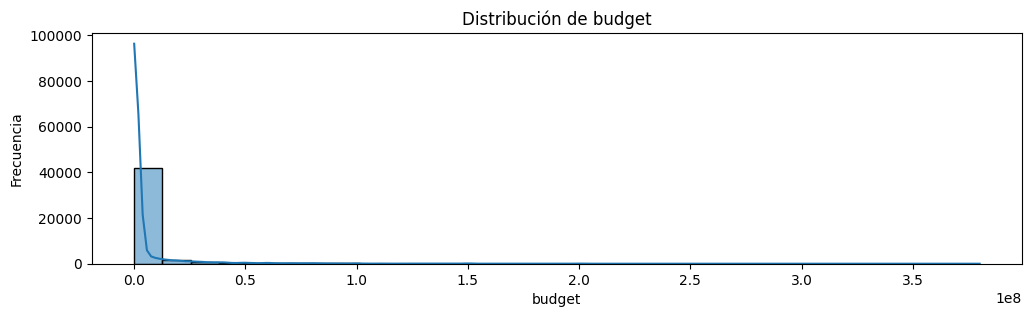

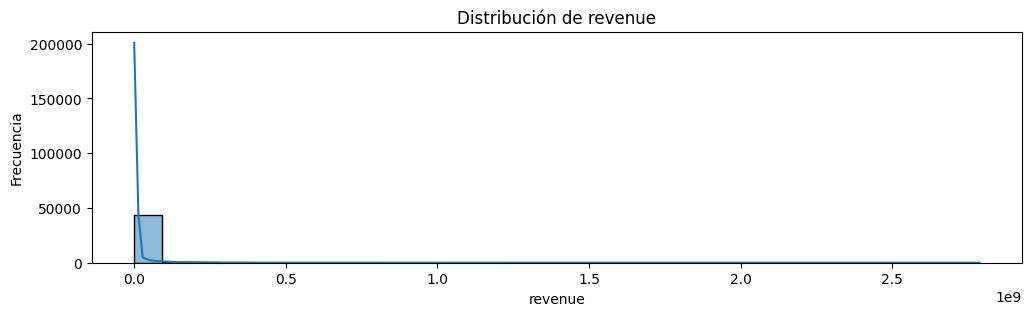

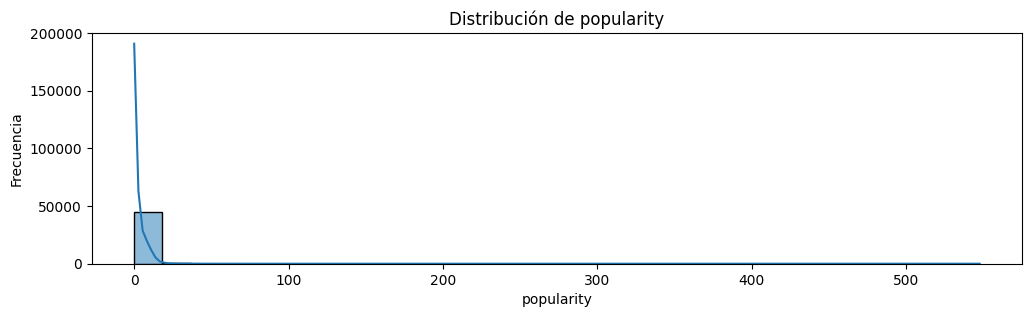

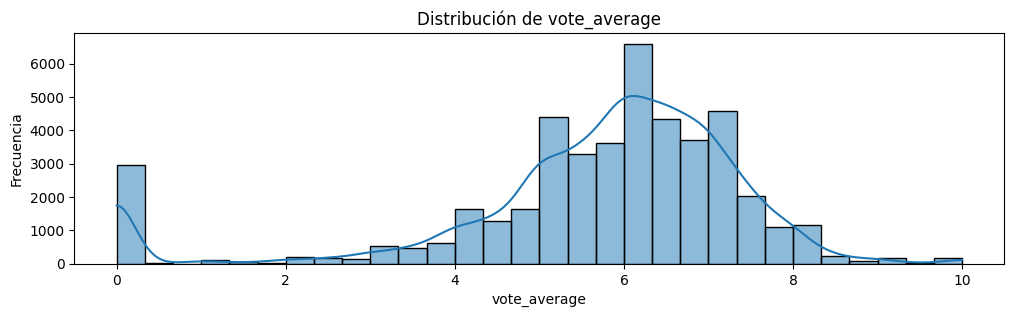

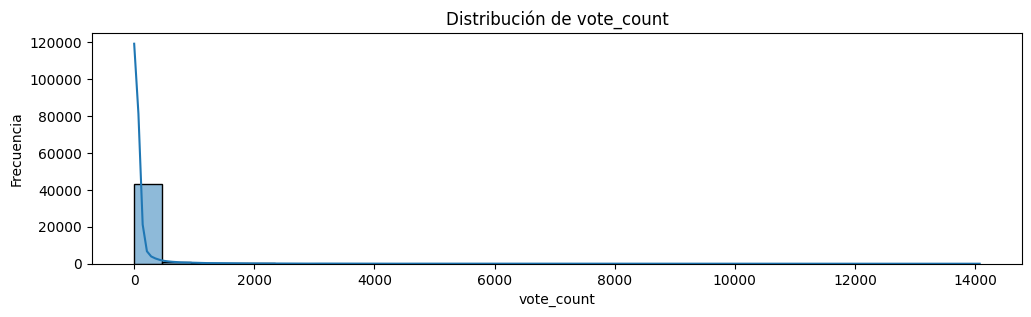

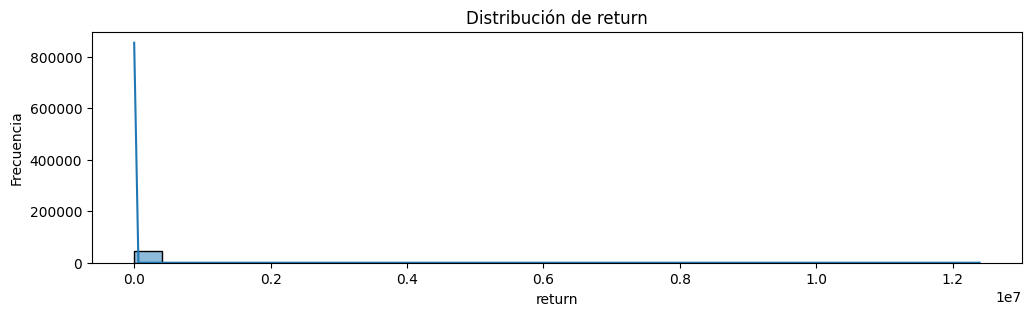

In [70]:
# Visualización de la distribución de las variables numéricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
numeric_columns = df_movies.select_dtypes(include=['number']).columns

# Configurar el tamaño de las figuras
plt.figure(figsize=(12, 2))

# Crear histogramas para cada columna numérica de df_movies
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(12, 3))
    sns.histplot(df_movies[col], bins=30, kde=True)  # kde=True agrega la curva de densidad
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# 


In [ ]:
import numpy as np

# Luego de ver los boxplot y poder identificar outliers en las variables numéricas así como la presencia de sesgos
# procedemos a realizar un tratamiento que mitigue futuras afectacion al recomendador
# Creamos una copia del DataFrame para realizar las transformaciones sin afectar el original
df_movies_cleaned = df_movies.copy()

# Aplicamos transformación logarítmica a "popularity" y "vote_count" para reducir sesgo
df_movies_cleaned["popularity"] = np.log1p(df_movies_cleaned["popularity"])
df_movies_cleaned["vote_count"] = np.log1p(df_movies_cleaned["vote_count"])

# Mostramos la distribución después de los ajustes
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Visualizamos el efecto del tratamiento en cada variable
sns.boxplot(x=df_movies_cleaned["popularity"], ax=axes[0, 1]).set_title("Distribución de Popularity (Post Log)")
sns.boxplot(x=df_movies_cleaned["vote_count"], ax=axes[1, 0]).set_title("Distribución de Vote Count (Post Log)")

plt.tight_layout()
plt.show()

# Mostramos el DataFrame actualizado para revisar los cambios
import ace_tools as tools
tools.display_dataframe_to_user(name="Datos Limpios de Películas", dataframe=df_movies_cleaned)
